In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mcm
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.lines import Line2D

/home/rubens/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("merged.csv")
ell = data[data["Zoo1"]=="E"]
sp = data[data["Zoo1"]=="S"]

data2 = pd.read_csv("G1-with-Zoo1.csv")
ell2 = data2[data2["Zoo1class"]=="E"]
sp2 = data2[data2["Zoo1class"]=="S"]

ell = pd.concat([ell,ell2["G1"]],axis=1)
sp = pd.concat([sp,sp2["G1"]],axis=1)

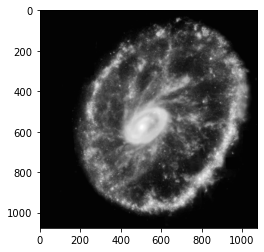

In [3]:
def cutBoundary(img,cut=10):
    shape = img.shape
    img2 = img[cut:shape[0]-cut,cut:shape[1]-cut]
    #print((img2.shape))
    s = np.min(img2.shape)
    s = s-1 if s%2==0 else s
    img2 = img2[:s,:s]
    return img2

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

cartwheel = mpimg.imread('data/cartwheel_CINZA_FINAL.png')     
cartwheel = rgb2gray(cartwheel)  
cartwheel = cutBoundary(cartwheel)

ellImg = mpimg.imread('data/elipticalJW.png')     
ellImg = rgb2gray(ellImg)  
ellImg = cutBoundary(ellImg)

spImg = mpimg.imread('data/spiralJW.png')     
spImg = rgb2gray(spImg)  
spImg = cutBoundary(spImg)


plt.figure()
plt.imshow(cartwheel, cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
mcm.a2(cartwheel)

0.5044117641758935

In [6]:
mcm.a3(cartwheel)

0.4636300010902008

In [7]:
mcm.s2(cartwheel)

0.00025953401736711346

In [3]:
mcm.s3(cartwheel)

0.9703193729207776

In [9]:
mcm.h(cartwheel,bins=100)

0.6919699288361081

# Baliza

In [3]:
mcm.s3(spImg, d=0.0001)

0.15486543417888482

In [4]:
mcm.s3(ellImg, d=0.0001)

0.47525200746097646

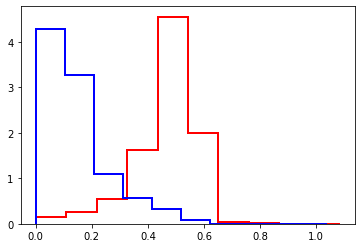

In [13]:
data = pd.read_csv("merged.csv")
ell = data[data["Zoo1"]=="E"]
sp = data[data["Zoo1"]=="S"]
plt.figure()
plt.hist(ell["sS3"],histtype='step',color='red',lw=2,density=True)
plt.hist(sp["sS3"],histtype='step',color="blue",lw=2,density=True)
plt.show()

In [9]:
mcm.g2(spImg, tol=0.00)

0.9919625389621123

In [8]:
mcm.g2(ellImg, tol=0.00)

0.6036899011135866

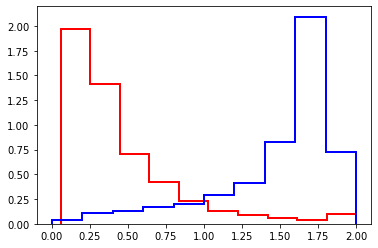

In [18]:
data = pd.read_csv("merged.csv")
ell = data[data["Zoo1"]=="E"]
sp = data[data["Zoo1"]=="S"]
plt.figure()
plt.hist(ell["sGa"],histtype='step',color='red',lw=2,density=True)
plt.hist(sp["sGa"],histtype='step',color="blue",lw=2,density=True)
plt.show()

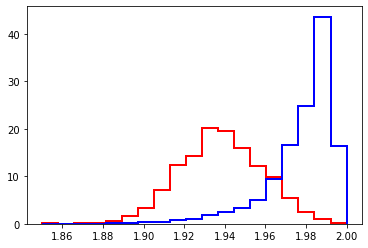

In [21]:

plt.figure()
plt.hist(ell["G1"],histtype='step',bins=np.linspace(1.85,2,20),color='red',lw=2,density=True)
plt.hist(sp["G1"],histtype='step',bins=np.linspace(1.85,2,20),color="blue",lw=2,density=True)
plt.show()

# Medida

In [23]:
mcm.s3(cartwheel, d=0.0001)

0.48175350617404217

In [24]:
mcm.g2(cartwheel, tol=0.00)

1.3945676342877904

In [4]:
mcm.g1(cartwheel, tol=0.00)

1.999928192629607

In [38]:
mcm.h(cartwheel, bins=150)

0.6940045087667869

# KDE Plot

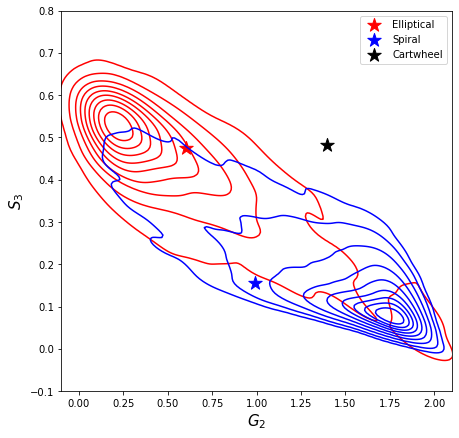

In [29]:
plt.figure(figsize=(7,7))
sns.kdeplot(data=ell,x='sGa',y='sS3',color='red')
sns.kdeplot(data=sp,x='sGa',y='sS3',color='blue')
plt.scatter(0.6036899011135866,0.47525200746097646,marker='*',s=200, color='r',label="Elliptical")
plt.scatter(0.9919625389621123,0.15486543417888482,marker='*',s=200, color='b',label="Spiral")
plt.scatter(1.3945676342877904,0.48175350617404217,marker='*',s=200, color='k',label="Cartwheel")

plt.ylim(-0.1,0.8)
plt.xlim(-0.1,2.1)
plt.xlabel("$G_2$",fontsize=15)
plt.ylabel("$S_3$",fontsize=15)
plt.legend()
plt.savefig("NewDataAnalysis.pdf",dpi=300)
plt.show()

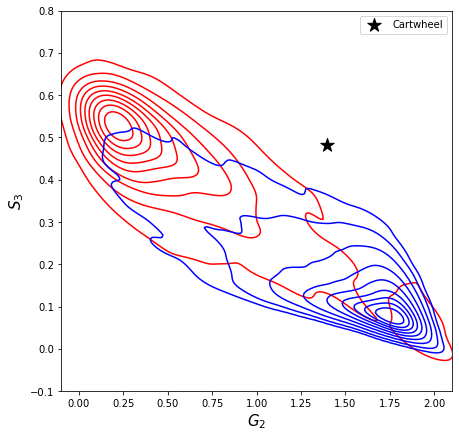

In [32]:
plt.figure(figsize=(7,7))
sns.kdeplot(data=ell,x='sGa',y='sS3',color='red',legend='Elliptical Galaxies')
sns.kdeplot(data=sp,x='sGa',y='sS3',color='blue',legend='Spiral Galaxies')
plt.scatter(1.3945676342877904,0.48175350617404217,marker='*',s=200, color='k',label="Cartwheel")

plt.ylim(-0.1,0.8)
plt.xlim(-0.1,2.1)
plt.xlabel("$G_2$",fontsize=15)
plt.ylabel("$S_3$",fontsize=15)
plt.legend()
plt.savefig("Cartwheel_classification.pdf",dpi=300)
plt.show()

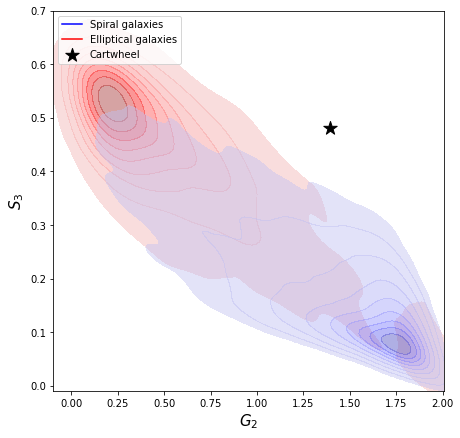

In [7]:
handle = [Line2D([0],[0], color='blue'),
         Line2D([0],[0], color='red')
         ]

plt.figure(figsize=(7,7))

sns.kdeplot(data=ell,x='sGa',y='sS3',color='red',legend='Elliptical Galaxies',fill=True,alpha=0.45)
sns.kdeplot(data=sp,x='sGa',y='sS3',color='blue',legend='Spiral Galaxies',fill=True,alpha=0.45)
sc = plt.scatter(1.3945676342877904,0.48175350617404217, marker='*', s=200, color='k')
handle.append(sc)

plt.ylim(-0.01,0.7)
plt.xlim(-0.1,2.005)
plt.xlabel("$G_2$",fontsize=15)
plt.ylabel("$S_3$",fontsize=15)

plt.legend(handle,["Spiral galaxies","Elliptical galaxies","Cartwheel"],loc='upper left')
plt.savefig("Cartwheel_classification_G1xH.pdf",dpi=300)
plt.show()

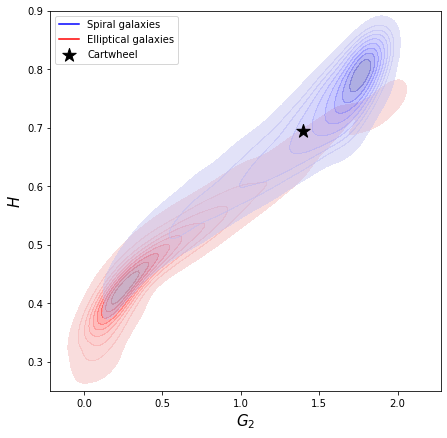

In [85]:
handle = [Line2D([0],[0], color='blue'),
         Line2D([0],[0], color='red')
         ]

plt.figure(figsize=(7,7))

sns.kdeplot(data=ell,x='sGa',y='sH',color='red',legend='Elliptical Galaxies',fill=True,alpha=0.45)
sns.kdeplot(data=sp,x='sGa',y='sH',color='blue',legend='Spiral Galaxies',fill=True,alpha=0.45)
sc = plt.scatter(1.3945676342877904,0.6940045087667869,marker='*',s=200, color='k')
handle.append(sc)

plt.ylim(0.25,0.9)
#plt.xlim(1.88,2.005)
plt.xlabel("$G_2$",fontsize=15)
plt.ylabel("$H$",fontsize=15)

plt.legend(handle,["Spiral galaxies","Elliptical galaxies","Cartwheel"],loc='upper left')
plt.savefig("Cartwheel_classification_G1xH.pdf",dpi=300)
plt.show()

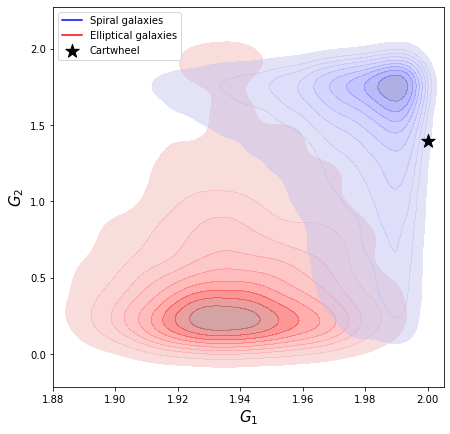

In [82]:
handle = [Line2D([0],[0], color='blue'),
         Line2D([0],[0], color='red')
         ]

plt.figure(figsize=(7,7))

sns.kdeplot(data=ell,x='G1',y='sGa',color='red',legend='Elliptical Galaxies',fill=True,alpha=0.45)
sns.kdeplot(data=sp,x='G1',y='sGa',color='blue',legend='Spiral Galaxies',fill=True,alpha=0.45)
sc = plt.scatter(1.999928192629607,1.3945676342877904,marker='*',s=200, color='k')
handle.append(sc)

#plt.ylim(0.25,0.9)
plt.xlim(1.88,2.005)
plt.xlabel("$G_1$",fontsize=15)
plt.ylabel("$G_2$",fontsize=15)

plt.legend(handle,["Spiral galaxies","Elliptical galaxies","Cartwheel"],loc='upper left')
plt.savefig("Cartwheel_classification_G1xH.pdf",dpi=300)
plt.show()

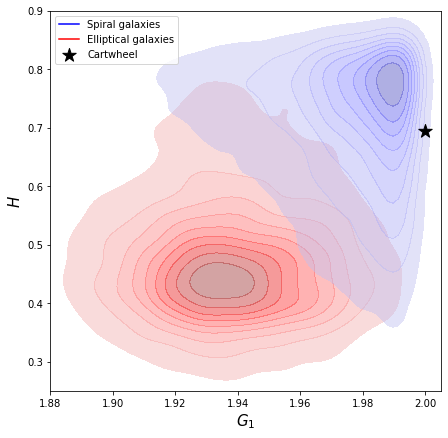

In [80]:
handle = [Line2D([0],[0], color='blue'),
         Line2D([0],[0], color='red')
         ]

plt.figure(figsize=(7,7))

sns.kdeplot(data=ell,x='G1',y='sH',color='red',legend='Elliptical Galaxies',fill=True,alpha=0.45)
sns.kdeplot(data=sp,x='G1',y='sH',color='blue',legend='Spiral Galaxies',fill=True,alpha=0.45)
sc = plt.scatter(1.999928192629607,0.6940045087667869,marker='*',s=200, color='k')
handle.append(sc)

plt.ylim(0.25,0.9)
plt.xlim(1.88,2.005)
plt.xlabel("$G_1$",fontsize=15)
plt.ylabel("$H$",fontsize=15)

plt.legend(handle,["Spiral galaxies","Elliptical galaxies","Cartwheel"],loc='upper left')
plt.savefig("Cartwheel_classification_G1xH.pdf",dpi=300)
plt.show()

# Exemplos canonicos

In [3]:
laminar = np.arange(10000).reshape(100,100).astype(float)
random = np.random.rand(10000).reshape(100,100).astype(float)
gaussian = np.random.randn(10000).reshape(100,100).astype(float)
zeros = np.zeros(10000).reshape(100,100).astype(float)

# Exemplo de suavização

In [8]:
from scipy.signal import butter, filtfilt

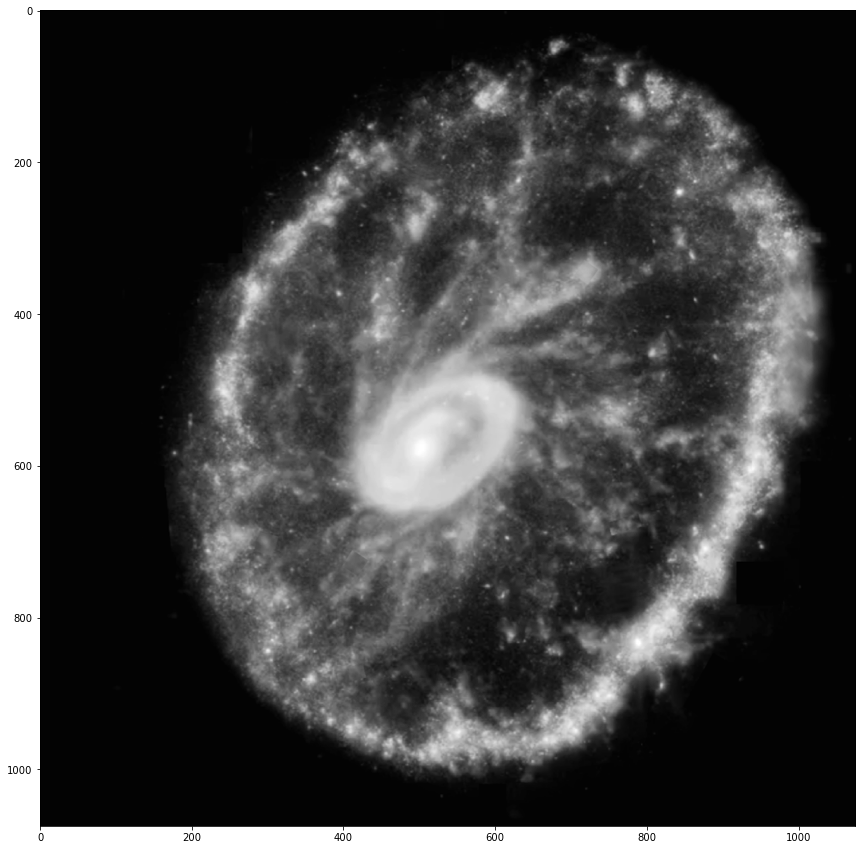

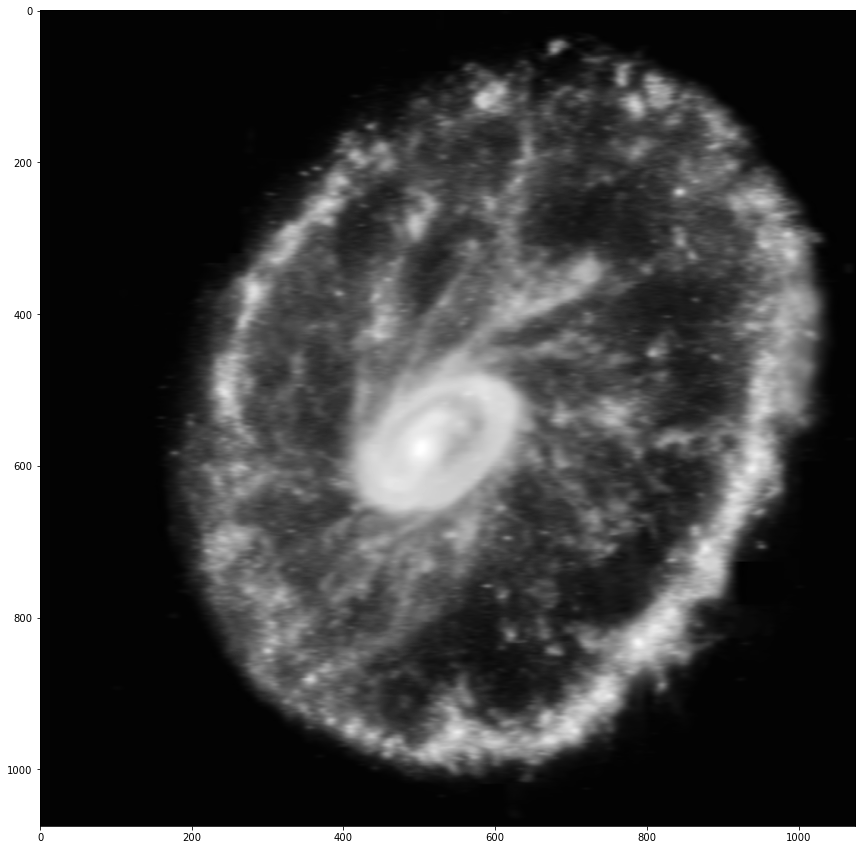

In [30]:
sm = filtfilt( *butter(N=2,Wn=0.1, btype='lowpass'), cartwheel)
plt.figure(figsize=(15,15))
plt.imshow(cartwheel, cmap=plt.get_cmap('gray'))
plt.figure(figsize=(15,15))
plt.imshow(sm, cmap=plt.get_cmap('gray'))
plt.show()